# 6.6 Sourcing & Analysing Time Series Data
# Project: Data for safer Cities

## Content

1. **Importing Libraries and Data**
2. **Subsettling and Wrangling time-series Data**
3. **Time series Analysis: Decomposition**
4. **Testing for Stationarity**

## 1. Importing Libraries and Data

In [15]:
!pip install statsmodels

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 7

In [17]:
# Creating shortcut
path = r'/home/justem/CF - Data Analyst/Achievement 6/2025-06-07 Data for safer Cities'

In [18]:
# Importing dataset accidents_grouped_coarse from last task
df_agg = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'accidents_grouped_coarse.csv'), index_col = False)

In [19]:
df_agg.head()

,Unnamed: 0,year,month,weekday,accident_category,accident_scenario,number_of_accidents,mean_distance_km,mean_location_density
0,0,2018,1,1,2,bike_only,1,3.175500,13.000000
1,1,2018,1,1,2,car_only,9,8.748595,4.444444
2,2,2018,1,1,2,ped_car,3,10.412133,9.000000
3,3,2018,1,1,3,bike_car,6,6.771687,6.333333
4,4,2018,1,1,3,bike_ped,1,6.648867,2.000000


In [20]:
df_agg.shape

(4214, 9)

## 2. Subsettling and Wrangling time-series Data

In [21]:
#Creating datetime index
df_agg['date'] = pd.to_datetime(df_agg[['year', 'month']].assign(day=1))
df_agg = df_agg.sort_values('date')

In [22]:
#Creating time series from total accidents per month
data = df_agg.groupby('date')['number_of_accidents'].sum()

In [23]:
data.head()

date
2018-01-01     884
2018-02-01     730
2018-03-01     802
2018-04-01    1216
2018-05-01    1461
Name: number_of_accidents, dtype: int64

I selected a monthly aggregation of all traffic accidents in Berlin between 2018 and 2021 to prepare a clean time series with consistent time intervals and a focus on long-term patterns. Aggregating by month smooths short-term fluctuations and makes seasonal trends more visible.

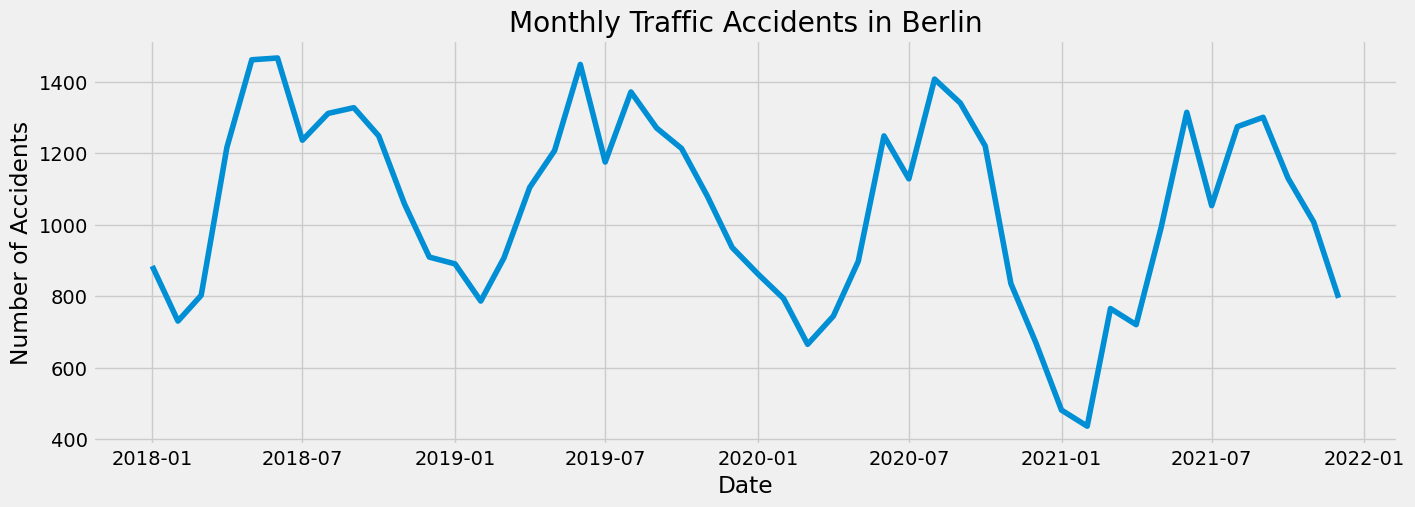

In [24]:
# Plotting full data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)
plt.title('Monthly Traffic Accidents in Berlin')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

In [28]:
# Subset from January 2018 to December 2021
data_sub = data['2018-01':'2021-12']

## 3. Time series Analysis: Decomposition

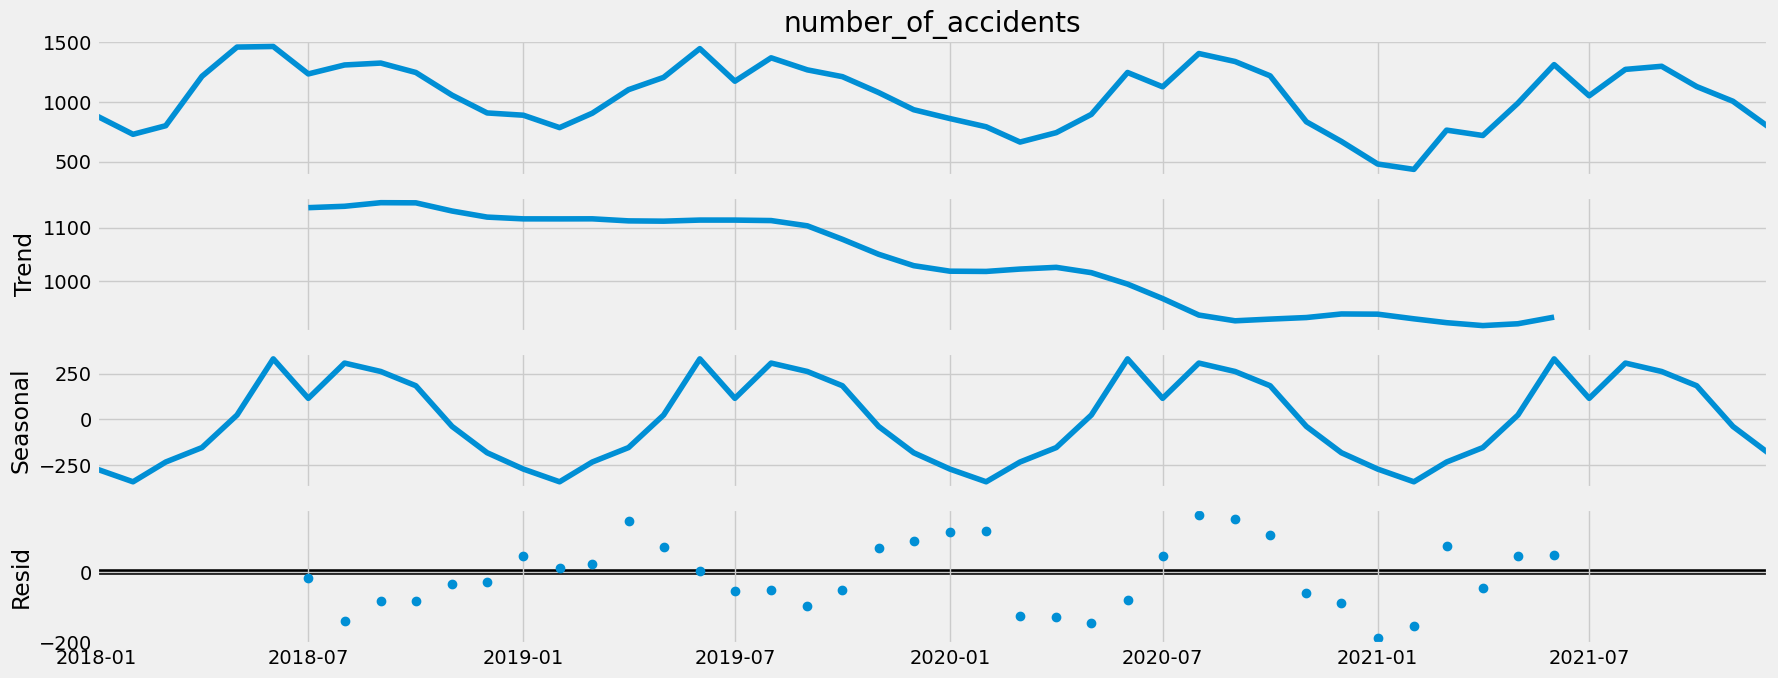

In [29]:
# Decomposing the time series
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')
decomposition.plot()
plt.show()

Trend:
The trend line shows a slight downward trend over time. It suggests that total accidents may have decreased slightly over the years (possibly due to lockdowns, changing traffic volumes, or safety measures).

Seasonality:
There's a clear seasonal pattern, we can see peaks and troughs repeating roughly every year. Accidents are higher in the summer months and drop in winter, likely due to:
- Higher cyclist/foot traffic in warm months
- Possibly better visibility and road conditions
- Or fewer cars on the road during holidays

Residuals:
There’s some fluctuation, but it’s mostly random noise, which is expected.

Suggested explanation:

The decomposition shows a clear seasonal pattern, with accident numbers rising during the summer and falling in winter. The trend component suggests a slight overall decrease in accident numbers across the observed years. The residuals appear randomly distributed, indicating that most of the variation is explained by seasonality and trend.

## 4. Testing for Stationarity

In [30]:
# Defining Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

In [31]:
# Applying Dickey-Fuller test
dickey_fuller(data_sub)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.553415
p-value                         0.000157
Number of Lags Used             3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


Test statistic = -4.55

p-value = 0.00016

This is well below 0.05, so we reject the null hypothesis of non-stationarity.

Conclusion: The original time series is already stationary, likely because we aggregated monthly and removed erratic variability.